https://zindi.africa/hackathons/zindi-mentorship-1-financial-inclusion-in-africa.

**Bank Account Prediction Analysis**

*Problem Statement*

Determine whether a study population from four African countries namely **Kenya, Uganda, Tanzania and Rwanda** owns a Bank account

In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import norm
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv('Train_v2.csv')

In [4]:
df.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3226,Kenya,2018,uniqueid_3227,No,Rural,No,6,33,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
3589,Kenya,2018,uniqueid_3590,No,Rural,No,3,37,Male,Child,Single/Never Married,Primary education,Informally employed
20207,Tanzania,2017,uniqueid_5405,Yes,Urban,Yes,3,36,Female,Head of Household,Widowed,Tertiary education,Formally employed Private
21482,Uganda,2018,uniqueid_60,No,Rural,No,6,78,Male,Head of Household,Married/Living together,Primary education,Self employed
5987,Kenya,2018,uniqueid_5988,No,Rural,No,6,28,Male,Child,Married/Living together,Primary education,Informally employed


In [5]:
df.shape

(23524, 13)

In [6]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
#selecting rows with age_of_repondent = 100, checking for outliers
df[df.age_of_respondent > 90]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
209,Kenya,2018,uniqueid_210,No,Rural,No,3,95,Female,Parent,Widowed,No formal education,Informally employed
340,Kenya,2018,uniqueid_341,No,Rural,No,2,95,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3,95,Male,Head of Household,Married/Living together,Primary education,Other Income
483,Kenya,2018,uniqueid_484,No,Rural,No,1,93,Female,Head of Household,Widowed,No formal education,Government Dependent
823,Kenya,2018,uniqueid_824,No,Rural,Yes,4,95,Male,Head of Household,Married/Living together,Primary education,Remittance Dependent
1389,Kenya,2018,uniqueid_1390,No,Rural,No,1,94,Female,Head of Household,Widowed,No formal education,Remittance Dependent
1434,Kenya,2018,uniqueid_1435,No,Rural,No,2,95,Female,Head of Household,Widowed,No formal education,Remittance Dependent
1482,Kenya,2018,uniqueid_1483,No,Rural,No,1,93,Male,Head of Household,Widowed,No formal education,Remittance Dependent
1833,Kenya,2018,uniqueid_1834,No,Urban,No,4,92,Male,Head of Household,Married/Living together,No formal education,Remittance Dependent
1851,Kenya,2018,uniqueid_1852,No,Rural,No,2,92,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing


In [17]:
pd.crosstab(df.bank_account,df.location_type, margins=True)

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


In [16]:
#selecting rows with same unique id
df[df.uniqueid == 'uniqueid_2']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4,26,Female,Spouse,Married/Living together,Secondary education,Self employed
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2,100,Male,Head of Household,Single/Never Married,No formal education,Self employed
21424,Uganda,2018,uniqueid_2,No,Urban,Yes,8,65,Female,Head of Household,Widowed,Secondary education,Self employed


**Exploratory Data Analysis(EDA)**

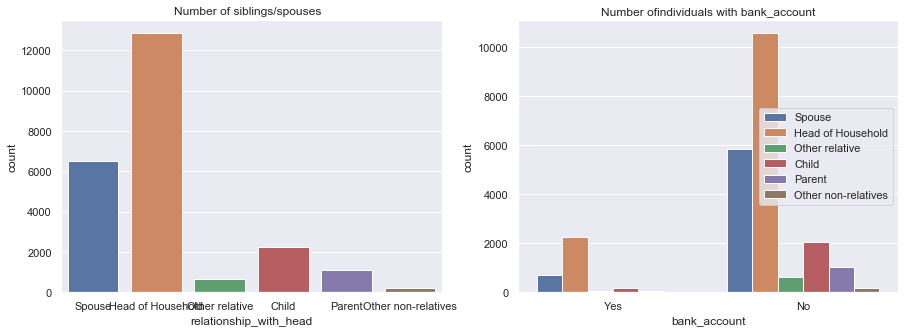

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['relationship_with_head'])
plt.title('Number of siblings/spouses  ');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="relationship_with_head", data=df)
plt.legend(loc='right')
plt.title('Number ofindividuals with bank_account');

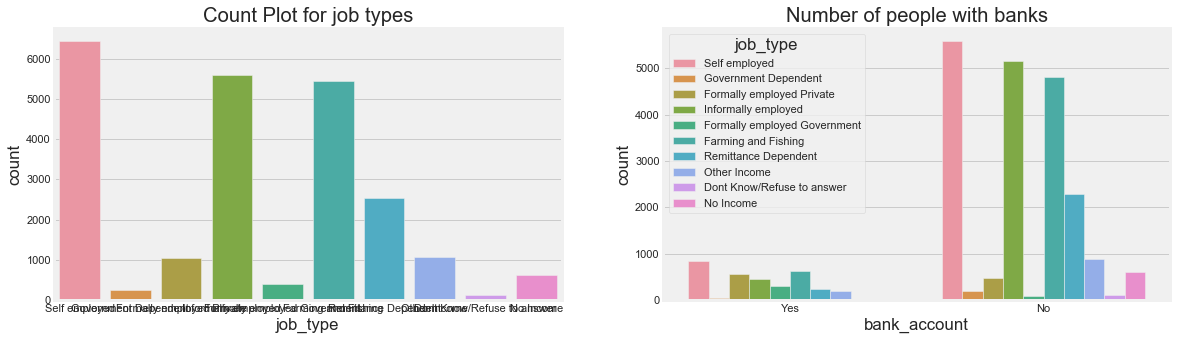

In [15]:
plt.figure(figsize=(20,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(df['job_type'])
plt.title('Count Plot for job types');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="job_type", data=df)
plt.title('Number of people with banks');

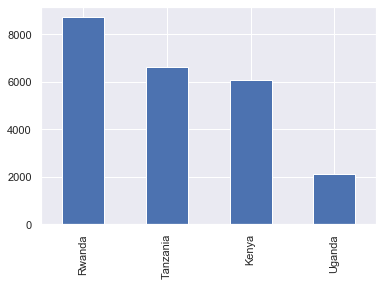

In [11]:
df['country'].value_counts().plot(kind='bar')

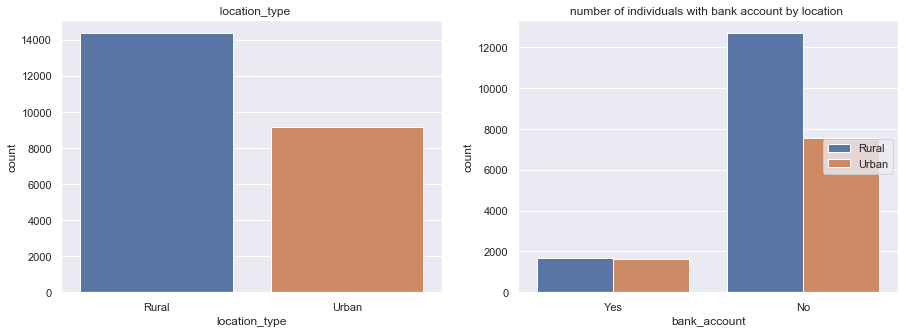

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['location_type'])
plt.title('  location_type');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="location_type", data=df)
plt.legend(loc='right')
plt.title('number of individuals with bank account by location ');

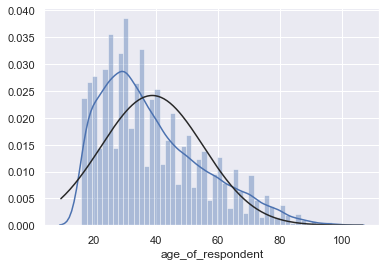

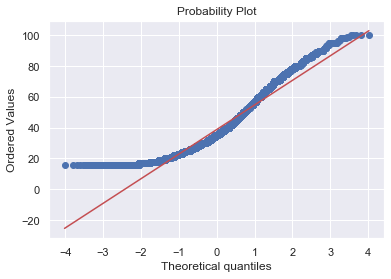

In [13]:

#histogram and normal probability plot
sns.distplot(df['age_of_respondent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['age_of_respondent'], plot=plt)

This shows same id was used in the four countries but unique in each country.

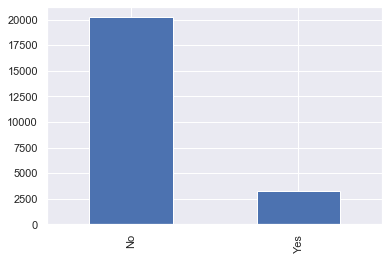

In [703]:
#visualising the number with bank accounts and without
df['bank_account'].value_counts().plot(kind='bar')

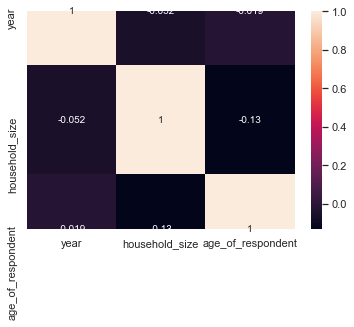

In [14]:
#visualizing corelation between columns
sns.heatmap(df.corr(), annot=True)

In [704]:
pd.crosstab(df.bank_account,df.education_level, margins=True)

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
bank_account,,,,,,,
No,4339,24,11698,3240,566,345,20212
Yes,176,11,1093,983,591,458,3312
All,4515,35,12791,4223,1157,803,23524


In [705]:
pd.crosstab(df.bank_account,df.job_type, margins=True)

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
bank_account,,,,,,,,,,,
No,112,4806,87,484,197,5152,614,884,2287,5589,20212
Yes,14,635,300,571,50,445,13,196,240,848,3312
All,126,5441,387,1055,247,5597,627,1080,2527,6437,23524


In [706]:
pd.crosstab(df.bank_account,df.gender_of_respondent, margins=True)

gender_of_respondent,Female,Male,All
bank_account,,,
No,12395,7817,20212
Yes,1482,1830,3312
All,13877,9647,23524


In [707]:
df.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [708]:
#import library
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [709]:
#label encoding with categorical columns
df['location_type'] = label.fit_transform(df['location_type'])
df['cellphone_access'] = label.fit_transform(df['cellphone_access'])
df['gender_of_respondent'] = label.fit_transform(df['gender_of_respondent'])
#df['marital_status'] = label.fit_transform(df['marital_status'])
#df['relationship_with_head'] = label.fit_transform(df['relationship_with_head'])
#df['education_level'] = label.fit_transform(df['education_level'])
#df['job_type'] = label.fit_transform(df['job_type'])

In [710]:
#mapping Yes and No values of bank account with 0 and 1 
df['bank_account'] = df['bank_account'].map({'No':0,'Yes':1})

In [711]:
df.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [713]:
#correlation between the bank account and the numerical columns
df.corr()['bank_account'].sort_values()

household_size         -0.028326
age_of_respondent       0.019429
location_type           0.087288
year                    0.112318
gender_of_respondent    0.117234
cellphone_access        0.209669
bank_account            1.000000
Name: bank_account, dtype: float64

In [717]:
df1=df.drop(columns=['country','year','uniqueid','marital_status','gender_of_respondent','education_level'], axis=1)

In [718]:
df_dum=pd.get_dummies(df1)

In [719]:
y=df_dum['bank_account']
X=df_dum.drop(columns=['bank_account'], axis=1)

In [720]:
X.shape

(23524, 20)

In [721]:
y.shape

(23524,)

In [722]:
X.age_of_respondent = X.age_of_respondent.apply(np.log10)
X.household_size = X.household_size.apply(np.log10)

**preprocessing with MinMaxScaler**

In [746]:

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

**KFold validation to handle data imbalance**

In [747]:
#from sklearn.model_selection import KFold
#cv = KFold(n_splits=30, random_state=42, shuffle=False)
#for train_index, test_index in cv.split(X):
#    print("Train Index: ", train_index, "\n")
#    print("Test Index: ", test_index)

**data splitting**

In [748]:
X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

In [749]:
X_train.shape,X_test.shape

((22740, 20), (784, 20))

**Modelling**


**xgboost classifier**

In [607]:
xgb_model = xgb.XGBClassifier()
parameters = {'max_depth': [2,4,6,8,10],
                     'n_estimators': [50,100,200,500],
             'gamma':[5,10,20,50,80]}

model = GridSearchCV(xgb_model, parameters, 
                     scoring='accuracy', verbose=1)

model.fit(X_train,y_train.values.ravel())
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 128.1min finished


0.8756376429199648
{'gamma': 5, 'max_depth': 2, 'n_estimators': 200}


In [752]:
xgb_model=XGBClassifier(
 n_estimators=200,
 gamma =5,
 max_depth = 2,

 )
xgb_model.fit(X_train,y_train.values.ravel())
xgb_model.score(X_test,y_test)

0.9387755102040817

In [753]:
y_predict = xgb_model.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[723,   7],
       [ 41,  13]], dtype=int64)

**Testing the model with test dataset**

In [731]:
test = pd.read_csv('Test_v2.csv')

In [732]:
test.shape

(10086, 12)

In [733]:
test.head(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private


In [734]:
test['location_type'] = label.fit_transform(test['location_type'])
test['cellphone_access'] = label.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = label.fit_transform(test['gender_of_respondent'])
test['marital_status'] = label.fit_transform(test['marital_status'])
#test['relationship_with_head'] = label.fit_transform(test['relationship_with_head'])
#test['education_level'] = label.fit_transform(test['education_level'])
#test['job_type'] = label.fit_transform(test['job_type'])

In [735]:
test1=test.drop(columns=['country','uniqueid','year','marital_status','gender_of_respondent','education_level'], axis=1)

In [736]:
test_x=pd.get_dummies(test1)
test_x.age_of_respondent = test_x.age_of_respondent.apply(np.log10)
test_x.household_size = test_x.household_size.apply(np.log10)

In [737]:
test_x = scaler.fit_transform(test_x)

In [738]:
#y_predict = model.predict(test_x)  #RandomForest
y_predict = xgb_model.predict(test_x) #xgboost

In [739]:
test['bank_account'] = y_predict

In [740]:
test['unique_id']=test['uniqueid']+' '+'x'+' '+test['country']

In [741]:
test.drop(columns=['country','year','uniqueid','household_size'], axis=1)
test.sample(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account,unique_id
5040,Rwanda,2016,uniqueid_11175,0,1,4,55,1,Head of Household,2,Primary education,Informally employed,0,uniqueid_11175 x Rwanda
2790,Rwanda,2016,uniqueid_8925,0,1,2,28,0,Head of Household,3,Primary education,Informally employed,0,uniqueid_8925 x Rwanda


In [742]:
results={'Uniqueid':test['unique_id'], 'bank_account':test['bank_account']}
result=pd.DataFrame(results)

In [743]:
result.to_csv('xgb1.csv', index=False)

In [744]:
#test_data['bank_account'] = test_data['bank_account'].map({1:'Yes',0:'No'})

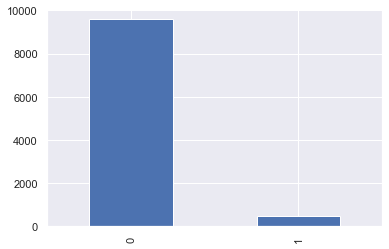

In [745]:
#using Random Forest Classifier model for predict bank account
test['bank_account'].value_counts().plot(kind='bar')